In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def f(x): 
    return 3*x**2 - 4*x +5

In [3]:
f(3.0)

20.0

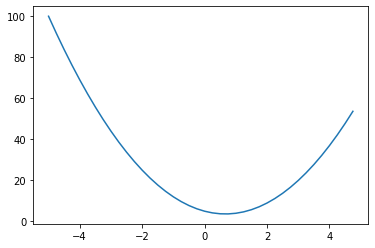

In [4]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [5]:
h = 0.0000000000001 #changing this only *approximates* the derivative since using floats; computer memory is finite
x = 3.0
f(x) # = 20
f(x+h) # see slope above. x+h , increasing x by a small amount h, would lead slightly upward on the slope 
# and indeed, f(x+h) is higher than f(x), is 20.014

#find the slope - normalize by rise over run 
(f(x+h) - f(x))/h 


13.997691894473974

In [6]:
h = 0.000001
x = 2/3
(f(x+h) - f(x))/h

2.999378523327323e-06

In [7]:
# let's get more ocmplex
a = 2.0
b = -.30
c = 10.0
d = a*b  + c
print(d)


9.4


In [8]:
h = 0.0001
#inputs 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c 
a += h 
d2 = a*b+c 

print('d1', d1)
print ('d2', d2)
# d2-d1 is how much it increased when we bumped by h
# (d2-d1)/h is the slope. normalize by h to get the slope
print ('slope, d2-d1', (d2-d1)/h)


d1 4.0
d2 3.999699999999999
slope, d2-d1 -3.000000000010772


In [67]:
# we want to know how each expression came to be 
# the values it came from - the children 
# and the expression to get there - the op: + or *
class Value: 

    # self is default, data is a number, children is a tuple of the two elements combined to create it, ops is how it came to be 
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op 
        self.label = label 
        self.grad = 0.0 # this is the gradient of the value with respect to the input
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        # creates a new Value out of the exiting values, 
        # where that Value's children is the set of (self,other) and where that Value's op is +
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e' 
d = e+c; d.label = 'd' 
f = Value (-2.0, label = 'f')
L = d*f; L.label = 'L'
L 

Value(data=-8.0)

In [49]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [50]:
d._op

'+'

In [68]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

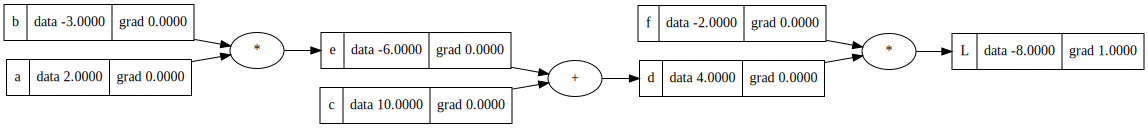

In [72]:
draw_dot(L)

In [71]:
L.grad = 1.0

In [65]:
def lol(): 
    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e' 
    d = e+c; d.label = 'd' 
    f = Value (-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L1 = L

    a = Value(2.0+h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e' 
    d = e+c; d.label = 'd' 
    f = Value (-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L2 = L

    print ((L2.data-L1.data)/h) 

lol() 
# prints the derivative of L with respect to h 
# because L is the value that we bumped a little bit by h 
# the derivative is ~6.0 
# if we bump L by h amount, then L will change by 6, *for the current value of L*




6.000000000021544
